# 대여소와 고도간의 관계 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

plt.rc('font', family='NanumBarunGothic') 


In [2]:
df = pd.read_csv("data/대여소별-고도데이터/서울시_따릉이대여소별_고도데이터.csv")

In [3]:
df = df[(df["위도"] > 1) & (df["경도"] > 1) ] # 위경도가 0으로 처리된 애들은 이제는 사라진 대여소들

In [4]:
df

,대여소_ID,주소1,주소2,위도,경도,dem
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598,12.43
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548,33.24
4,ST-995,서울특별시 양천구 신정동 621-14,계남공원 입구 주출입구 좌측,37.510681,126.857399,18.50
5,ST-994,서울특별시 양천구 목동서로161,SBS방송국,37.529163,126.872749,8.98
6,ST-993,서울특별시 양천구 신월로 342-1 구두수선대19,NaN,37.521511,126.857384,8.70
...,...,...,...,...,...,...
2495,ST-158,서울특별시 종로구 대학로 104,대학로 마로니에공원,37.579784,127.002533,28.34
2496,ST-1579,서울특별시 송파구 장지동 901-1,NaN,37.474583,127.137543,26.15
2497,ST-1578,서울특별시 강남구 자곡로 260,강남한양수자인아파트,37.477341,127.113274,15.85
2498,ST-1577,서울특별시 강남구 강남대로 지하 396,역삼.서초.삼성 세무서 앞 (역삼빌딩 앞),37.498470,127.030113,26.65


In [5]:
from get_dem_dataset import get_dem_dataset

In [6]:
dem = get_dem_dataset()

In [7]:
dem

,z,geometry
0,511.02,POINT (127.00251 37.69258)
1,483.44,POINT (127.00251 37.69177)
2,455.26,POINT (127.00251 37.69096)
3,410.37,POINT (127.00251 37.69015)
4,512.67,POINT (127.00353 37.69420)
...,...,...
111532,4.39,POINT (126.95464 37.51896)
111533,6.98,POINT (126.95464 37.51815)
111534,3.56,POINT (126.95464 37.51733)
111535,3.05,POINT (126.95464 37.51652)


In [8]:
shp = gpd.read_file("data/행정구역시군구경계/LARD_ADM_SECT_SGG_서울.zip")

shp = shp.to_crs("EPSG:4326")

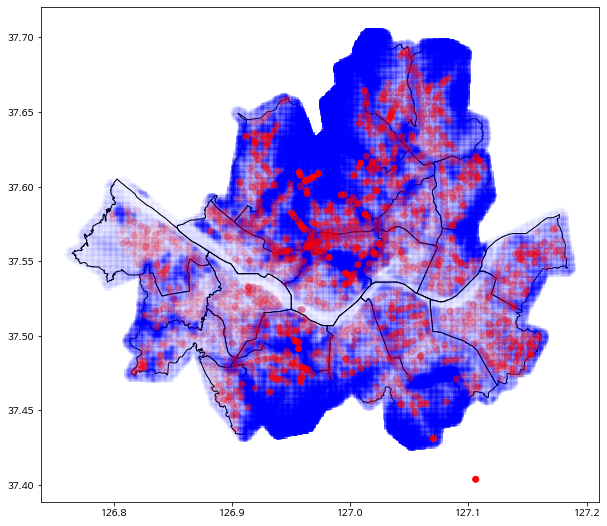

In [9]:
fig, ax = plt.subplots(figsize=(10,10))


shp.geometry.plot(ax=ax, color="white", edgecolor="black")

ax.scatter(
    dem.geometry.x,
    dem.geometry.y,
    marker="s",
    s=10,
    color="blue",
    alpha=dem.z/dem.z.max()
)

ax.scatter(
    df["경도"],
    df["위도"],
    
    alpha=df.dem/df.dem.max(),
    color="red"
)



* 붉은 점들은 대여소의 위치, 불투명도는 해당 대여소의 고도를 의미
* 푸른색 그리드들의 불투명도는 해당 지역의 고도를 의미.
* 서울밖에 있는 데이터는 실제로 경기도 판교에 위치한 따릉이 대여소

In [10]:
df[df["주소1"].str.startswith("서울") == False]

,대여소_ID,주소1,주소2,위도,경도,dem
1554,ST-2426,경기 성남시 분당구 판교로 289,판교로,37.403549,127.10611,117.53
